In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

import numpy as np
import cartopy.crs as ccrs
import cartopy

In [2]:
# open the netcdf file containg an altitude slice of the model (done to save space for this demo) 
# as an xarray dataset 
sefile = "waccm_se_slice.nc"
ds = xr.open_dataset(sefile)

# extract dimension data
x=ds['lon'].data
x[x > 180.] -= 360 # shift longitude from 0-360˚ to -180-180˚
y=ds['lat'].data

# extract the temperature field
# select a single timestep
tn = ds['T'].isel(time=2).squeeze() 

# print out the number of grid points and pressure level
print('number of grid points: ', tn.shape) 
print('pressure level: ', ds['lev'].values)

# calculate a triangulation based on lon and lat values
tri = Triangulation(x, y)

number of grid points:  (48600,)
pressure level:  [0.01081383]


CPU times: user 1.32 s, sys: 47.8 ms, total: 1.37 s
Wall time: 1.35 s


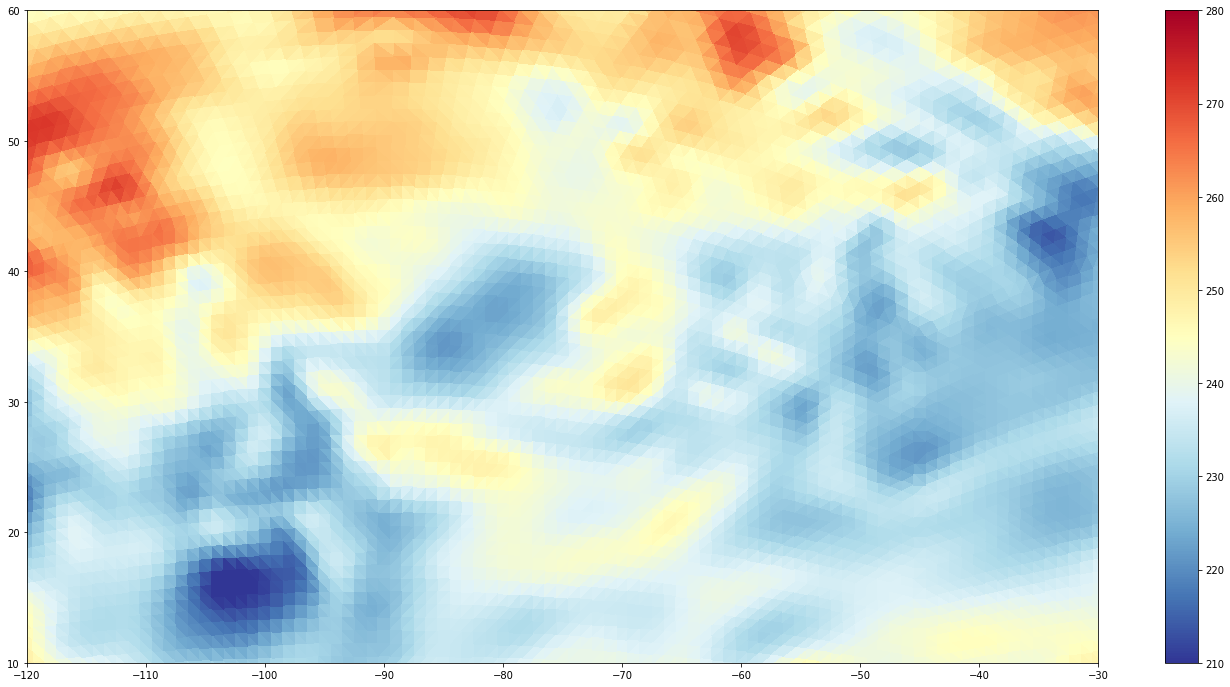

In [4]:
# use tripcolor() to plot a portion of the data (120-30˚W, 10-60˚N) on the triangulation grid
# this is fairly quick

fig = plt.figure(figsize=(24,12))

ax = plt.axes()

ax.set_xlim([-120, -30])
ax.set_ylim([10,60])

%time im = ax.tripcolor(tri, tn, shading = 'flat', vmin=210, vmax=280, cmap='RdYlBu_r')

cb = plt.colorbar(im)

plt.show()

CPU times: user 12 s, sys: 219 ms, total: 12.2 s
Wall time: 12.2 s


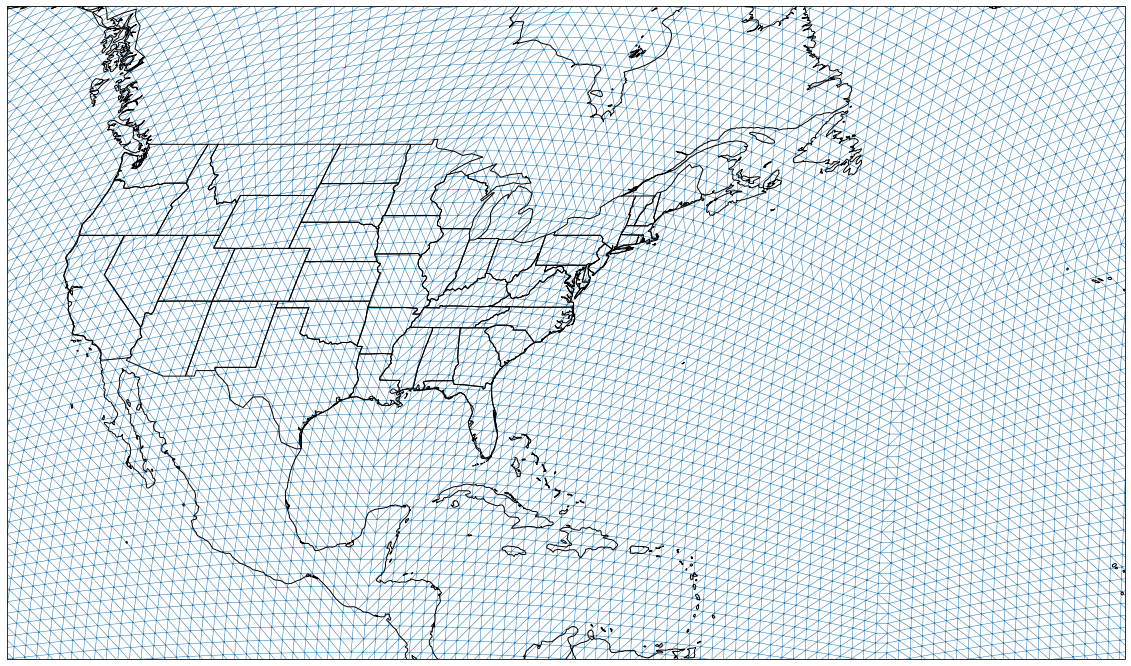

In [5]:
# for final plots, adding a projection and continents can be done
# here is the plot the triangulation transformed

fig = plt.figure(figsize=(24,12))
    
ax = plt.axes(projection=ccrs.Robinson())

plt_extent = [-120, -30, 10, 60]
ax.coastlines('50m')
ax.set_extent(plt_extent, crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.STATES)

%time mesh = ax.triplot(tri, transform=ccrs.PlateCarree(), linewidth=0.5)

plt.show()


CPU times: user 1min 10s, sys: 322 ms, total: 1min 10s
Wall time: 1min 10s


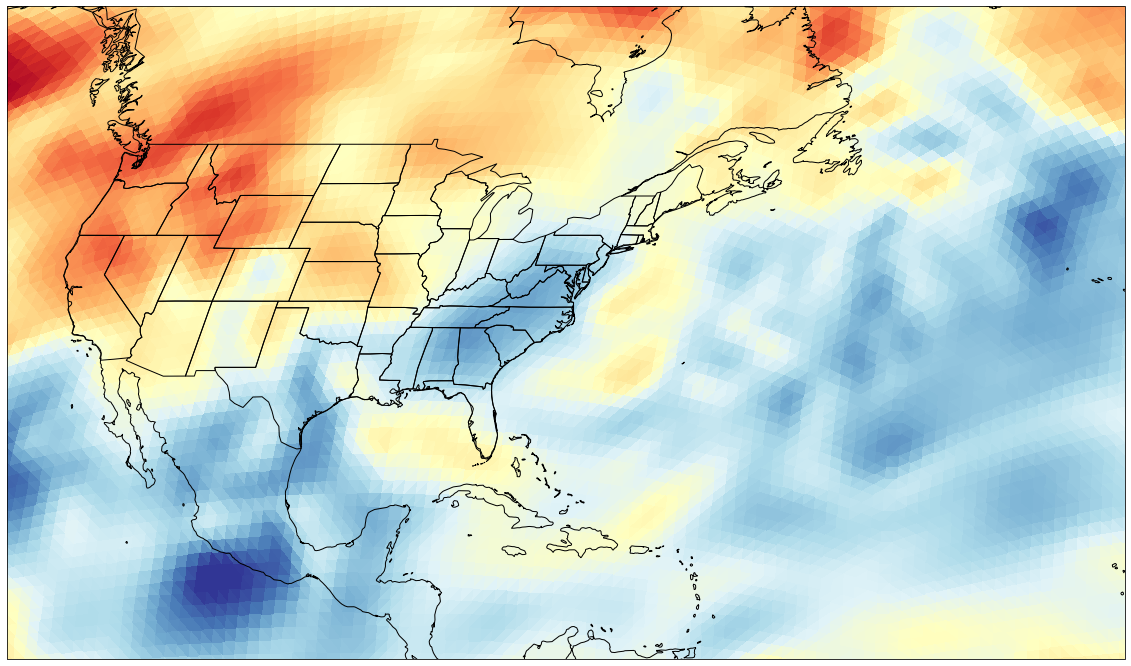

In [6]:
# and the same temperatures transformed
# this does take considerably longer

fig = plt.figure(figsize=(24,12))
    
ax = plt.axes(projection=ccrs.Robinson())

plt_extent = [-120, -30, 10, 60]
ax.coastlines('50m')
ax.set_extent(plt_extent, crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.STATES)

%time ax.tripcolor(tri, tn, shading = 'flat', transform=ccrs.PlateCarree(), vmin=210, vmax=280, cmap='RdYlBu_r')

plt.show()

CPU times: user 1min 10s, sys: 279 ms, total: 1min 10s
Wall time: 1min 10s


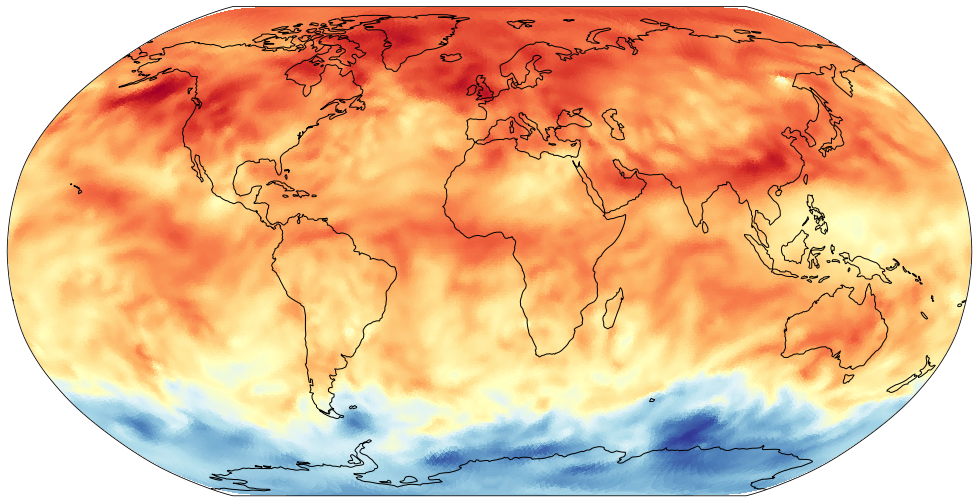

In [7]:
# If a global map is required, use set_global() instead of set_extent()

fig = plt.figure(figsize=(18,9))
    
ax = plt.axes(projection=ccrs.Robinson())

#zoom the map out as much as possible & add coastlines
ax.set_global() 
ax.coastlines()

%time ax.tripcolor(tri, tn, shading = 'flat', transform=ccrs.PlateCarree(), cmap='RdYlBu_r')

plt.show()